## Transfer Learning Resnet-50

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
"""
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
"""
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 33 images belonging to 3 classes.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
    callbacks=[early_stop]
)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 [==============================] - 35s 11s/step - loss: 4.8774 - accuracy: 0.4269 - val_loss: 2.7021 - val_accuracy: 0.3030
Epoch 2/100
3/3 [==============================] - 25s 9s/step - loss: 8.4700 - accuracy: 0.4426 - val_loss: 1.4583 - val_accuracy: 0.3030
Epoch 3/100
3/3 [==============================] - 26s 9s/step - loss: 9.1749 - accuracy: 0.2706 - val_loss: 1.9223 - val_accuracy: 0.3939
Epoch 4/100
3/3 [==============================] - 26s 9s/step - loss: 10.4337 - accuracy: 0.3203 - val_loss: 1.2989 - val_accuracy: 0.3030
Epoch 5/100
3/3 [==============================] - 27s 9s/step - loss: 6.6410 - accuracy: 0.3520 - val_loss: 1.1810 - val_accuracy: 0.3030
Epoch 6/100
3/3 [==============================] - 26s 10s/step - loss: 5.7218 - accuracy: 0.3756 - val_loss: 1.4419 - val_accuracy: 0.3030
Epoch 7/100
3/3 [==============================] - 25s 9s/step - loss: 4.0437 - accuracy: 0.2992 - val_loss: 1.5771 - val_accuracy: 0.3030
Epoch 8/100
3/3 [=======

In [14]:
import matplotlib.pyplot as plt

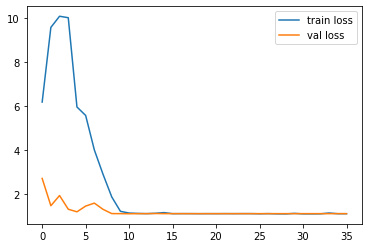

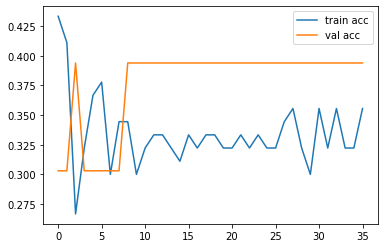

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.33052245, 0.33464482, 0.33483276],
       [0.

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,y_pred))
print(confusion_matrix(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.39      1.00      0.57        13

    accuracy                           0.39        33
   macro avg       0.13      0.33      0.19        33
weighted avg       0.16      0.39      0.22        33

[[ 0  0 10]
 [ 0  0 10]
 [ 0  0 13]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [24]:
result

array([[0.08822154, 0.00446592, 0.9073125 ]], dtype=float32)

In [25]:
def correctclass(result):
    result = np.argmax(result, axis=1)
    if result[0] == 0:
        prediction = 'Bacterial leaf blight'
    elif result[0] == 1:
        prediction = 'Brown spot'
    else:
        prediction = 'Leaf smut'
    return prediction

In [26]:
print(correctclass(result))

Leaf smut


In [27]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.26673886, 0.02456921, 0.70869195]], dtype=float32)

In [28]:
print(correctclass(result))

Leaf smut


In [29]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.23664288, 0.14457783, 0.6187793 ]], dtype=float32)

In [30]:
print(correctclass(result))

Leaf smut
